In [3]:
# Import the libraries
from bs4 import BeautifulSoup
# import requests

# url="https://forum.tudiabetes.org/categories"
# html=requests.get(url)
# # Make a GET request to fetch the raw HTML content
# html_content = requests.get(url).text

# # Parse the html content
# soup = BeautifulSoup(html_content, "lxml")

In [4]:
#https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 5.3MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.7 kB]
Get:12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [5]:
import selenium

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [8]:
cd /gdrive/MyDrive/Stemaway/

/gdrive/MyDrive/Stemaway


In [ ]:
ls

BeautifulSoup.ipynb  practiceBeautifulSoup.ipynb
practice02.ipynb     website.gdoc


"https://forum.tudiabetes.org/categories"<-- the main site that we start to browse on its called "tudiabetes forums"

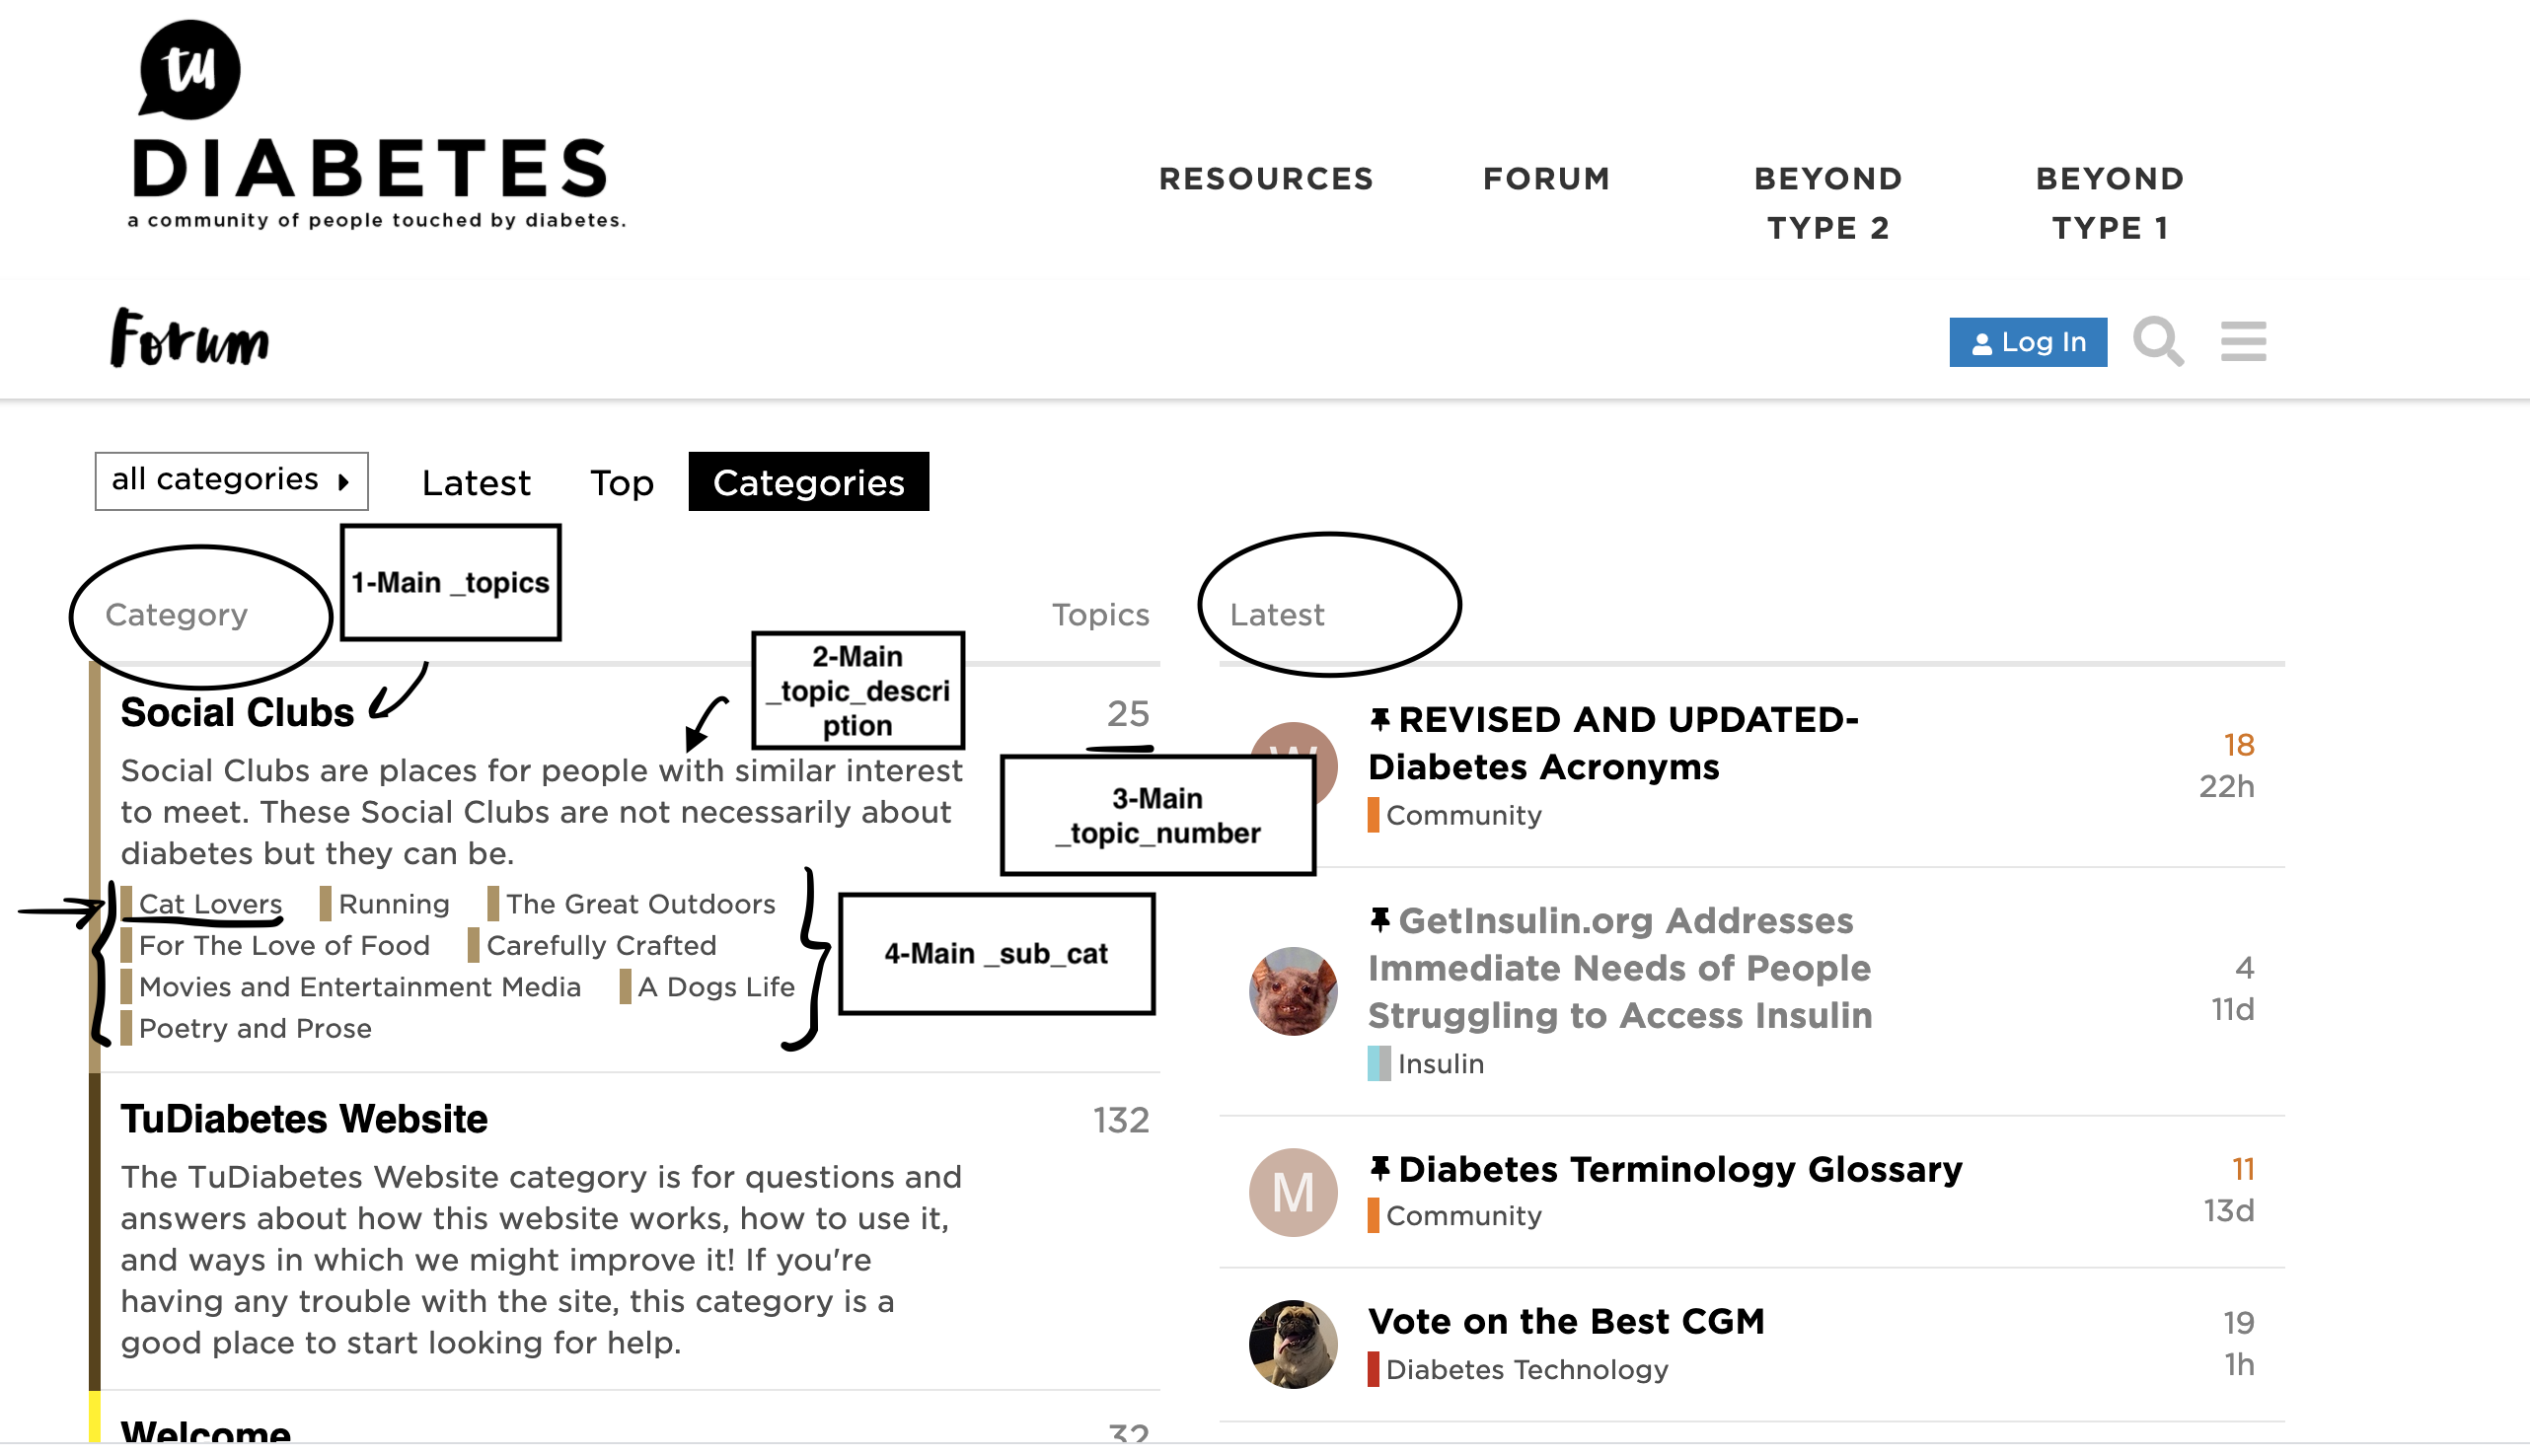


#1-Main Topics

In [19]:
main_url="https://forum.tudiabetes.org/categories"



# create a new chrome session
# driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)

driver.get(main_url)

python_button = driver.find_element_by_id('main') #FHSU
python_button.click()

In [20]:
main_soup=BeautifulSoup(driver.page_source, 'lxml')
main_topics=[e.text for e in main_soup.find_all('div', attrs={"class": "category-text-title"})]
main_topics


['\n\n Social Clubs\n',
 '\n\n TuDiabetes Website\n',
 '\n\n Welcome\n',
 '\n\n Type 1 and LADA\n',
 '\n\n Type 2\n',
 '\n\n Diabetes and Pregnancy\n',
 '\n\n Community\n',
 '\n\n Food\n',
 '\n\n Treatment\n',
 '\n\n Diabetes Technology\n',
 '\n\n Healthy Living\n',
 '\n\n Diabetes Complications and other Conditions\n',
 '\n\n Mental and Emotional Wellness\n',
 '\n\n Diabetes Advocacy\n',
 '\n\n COVID-19\n']

#2-Main topic Description

In [21]:

main_desc=[e.text for e in main_soup.find_all('div', attrs={"class": "category-description"})]
main_desc

['\n          Social Clubs are places for people with similar interest to meet. These Social Clubs are not necessarily about diabetes but they can be.\n        ',
 "\n          The TuDiabetes Website category is for questions and answers about how this website works, how to use it, and ways in which we might improve it!  If you're having any trouble with the site, this category is a good place to start looking for help.\n        ",
 '\n          WELCOME to our forum! We are happy to have you here and would like to get to know you better!\n        ',
 '\n          The Type 1 Diabetes and LADA category is intended for discussion specifically for, by and about people with Type 1 Diabetes and LADA.\n        ',
 '\n          The Type 2 Diabetes category is intended for discussion specifically for, by and about people with Type 2 Diabetes.\n        ',
 '\n          The Diabetes and Pregnancy category is for discussion for, by and/or about women with any type of diabetes who are, have been or

In [22]:
import pandas as pd
import numpy as np

In [23]:
len(main_topics)

15

#3-Main_topic_number

In [24]:
topics_number=[e.text for e in main_soup.find_all('span',attrs={"class": "value"})]
print(topics_number)
print(len(topics_number))

['25', '132', '32', '33', '6', '1', '4', '4', '5', '27', '1011', '3', '3', '492', '2']
15


#4-Main_sub_cat

In [25]:
sub_cat=[]
for i in main_soup.find_all('td', attrs={"class": "category"}):
  b=i.find_all('div', attrs={"class": "subcategories"})
  for j in b:
    c=[e.text for e in j.find_all('span',attrs={"class": "category-name"})]
    sub_cat.append(c)



sub_cat

[['Cat Lovers',
  'Running',
  'The Great Outdoors',
  'For The Love of Food',
  'Carefully Crafted',
  'Movies and Entertainment Media',
  'A Dogs Life',
  'Poetry and Prose'],
 ['New to Type 1 Diabetes',
  'Parents of Children with Type 1 Diabetes',
  'Teens and Young Adults'],
 ['New to Type 2 diabetes', 'Teens and Young Adults'],
 ['gestational diabetes',
  'Trying to Get Pregnant',
  'Managing Pregnancy with Diabetes'],
 ['Welcome New Members',
  'Share Your Stories',
  'Arts and Poetry',
  'Fun and Games',
  'Polls',
  'Recalls',
  'Events',
  'Member Shout Out'],
 ['Recipes', 'Nutrition'],
 ['Oral Medications and non-insulin injectables', 'Insulin', 'Research/Cure'],
 ['Insulin Pumps',
  'Glucose Monitoring',
  'Diabetes Apps',
  'DIY Closed Loop Systems',
  'Commercial Closed Loop Systems'],
 ['Physical Activity', 'Weight'],
 ['Eyes', 'Kidneys', 'Digestion', 'Feet', 'Other Conditions'],
 ['Self Advocacy', 'Public Advocacy']]

#df_main

In [35]:
sub_topic=pd.Series(sub_cat)
main_topics=pd.Series(main_topics)
df_main=pd.DataFrame({'main_topics':main_topics,'main_topic_desc':main_desc, 'sub_cat':sub_topic.reindex(main_topics.index),'topic_value':topics_number})
df_main

,main_topics,main_topic_desc,sub_cat,topic_value
0,\n\n Social Clubs\n,\n Social Clubs are places for people...,"[Cat Lovers, Running, The Great Outdoors, For ...",25
1,\n\n TuDiabetes Website\n,\n The TuDiabetes Website category is...,"[New to Type 1 Diabetes, Parents of Children w...",132
2,\n\n Welcome\n,\n WELCOME to our forum! We are happy...,"[New to Type 2 diabetes, Teens and Young Adults]",32
3,\n\n Type 1 and LADA\n,\n The Type 1 Diabetes and LADA categ...,"[gestational diabetes, Trying to Get Pregnant,...",33
4,\n\n Type 2\n,\n The Type 2 Diabetes category is in...,"[Welcome New Members, Share Your Stories, Arts...",6
5,\n\n Diabetes and Pregnancy\n,\n The Diabetes and Pregnancy categor...,"[Recipes, Nutrition]",1
6,\n\n Community\n,\n The Community category is intended...,"[Oral Medications and non-insulin injectables,...",4
7,\n\n Food\n,\n This category is for any conversat...,"[Insulin Pumps, Glucose Monitoring, Diabetes A...",4
8,\n\n Treatment\n,\n The Treatment category is for ques...,"[Physical Activity, Weight]",5
9,\n\n Diabetes Technology\n,\n The Diabetes Technology category i...,"[Eyes, Kidneys, Digestion, Feet, Other Conditi...",27


In [187]:
df_main.to_csv('df_main.csv',index=False)

#TuDiabetes Website
Looking at the main_topics of this forum we see that "TuDiabetes Website" has 132 sub_topics so I decided to select that one for scraping


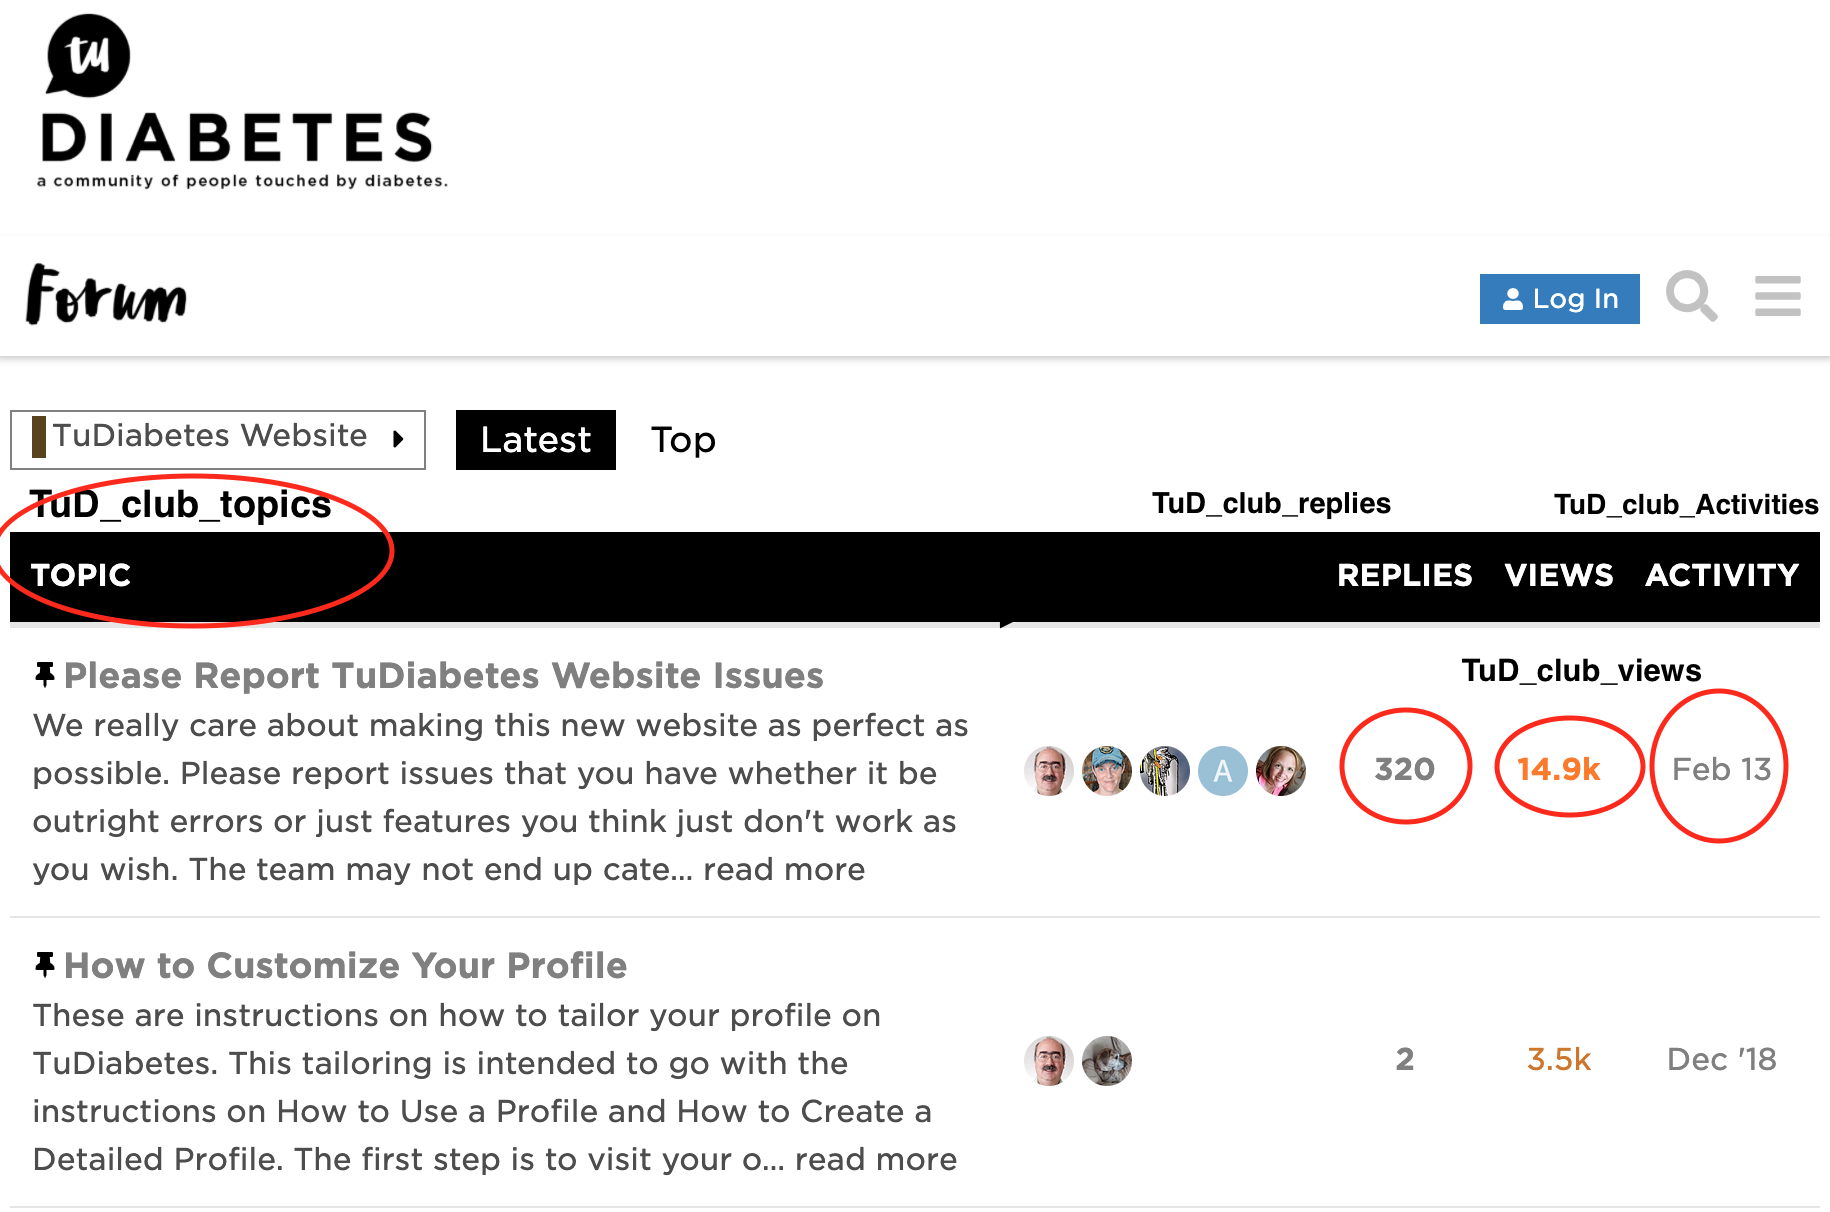

In [9]:
TuD_url="https://forum.tudiabetes.org/c/meta/3"



# create a new Firefox session
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(30)
driver.get(TuD_url)

python_button = driver.find_element_by_id('main') #FHSU
python_button.click()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


## TuD_club_topics

In [10]:
#Selenium hands the page source to Beautiful Soup
TuD_soup=BeautifulSoup(driver.page_source, 'lxml')
TuD_club_topics=[e.text for e in TuD_soup.find_all('span',attrs={'class':'link-top-line'})]
TuD_club_topics

['\n\nPlease Report TuDiabetes Website Issues\n',
 '\n\nHow to Customize Your Profile\n',
 '\n\nCurrent Process For Setting Passwords\n',
 '\n\nAbout the TuDiabetes Website category\n',
 '\n\nMigration FAQ\n',
 'Old timers of the original Tudiabetes\n',
 'Home page looking good on PC! Not so good on iphone\n',
 'Change “T1D Tech” to something more inclusive?\n',
 'A step back for the home page\n',
 'Some website improvement noticed by me!\n',
 'I used to be able to post images but cannot anymore\n',
 'Insulin pumps linked to more reports of injury and death than any other medical device, records show\n',
 'Adding Links/Outside Sources to your discussion\n',
 'How to quote someone in a post\n',
 'Alt text for images (website accessibility)\n',
 'Ads in the middle of a person’s post?\n',
 'Blogging on TuDiabetes is changing\n',
 'New logo is dominating over everything\n',
 'Visual changes are HAPPENING!\n',
 'This new webpages I can’t stand anymore please change it back\n',
 'Back online

In [ ]:
len(TuD_club_topics)

30

## TuD_club_replies

In [67]:
TuD_club_replies=[]
for i in TuD_soup.find_all('a', attrs={"class": "posts-map"}):
  c=[e.text for e in i.find_all('span', attrs={"class": "number"})]
  TuD_club_replies.append(c)


  # for j in b:
  #   c=[e.text for e in j.find_all('span',attrs={"class": "category-name"})]
  #   TuD_club_replies.append(c)

In [68]:
TuD_club_replies = [val for sublist in TuD_club_replies for val in sublist]
TuD_club_replies

['320',
 '2',
 '1',
 '2',
 '6',
 '44',
 '7',
 '2',
 '2',
 '1',
 '7',
 '154',
 '0',
 '2',
 '30',
 '13',
 '8',
 '74',
 '15',
 '15',
 '7',
 '12',
 '2',
 '1',
 '5',
 '2',
 '6',
 '3',
 '6',
 '1']

In [63]:
len(TuD_club_replies)

30

## TuD_club_views

In [57]:

TuD_club_views=[]
for i in TuD_soup.find_all('td', attrs={"class": re.compile(r'num views')}):
  c=[e.text for e in i.find_all('span', attrs={"class": "number"})]
  TuD_club_views.append(c)
TuD_club_views = [val for sublist in TuD_club_views for val in sublist]
TuD_club_views


['14.9k',
 '3.5k',
 '3.5k',
 '3.3k',
 '3.7k',
 '1.4k',
 '426',
 '323',
 '228',
 '278',
 '279',
 '3.4k',
 '315',
 '467',
 '1.7k',
 '802',
 '3.2k',
 '3.2k',
 '1.3k',
 '1.5k',
 '1.3k',
 '1.8k',
 '1.5k',
 '1.3k',
 '2.2k',
 '2.1k',
 '2.2k',
 '2.2k',
 '2.1k',
 '2.1k']

In [64]:
len(TuD_club_views)

30

In [52]:
import re

In [54]:
TuD_soup.find_all('td', attrs={"class": re.compile(r'num views heatmap')})


[<td class="num views heatmap-high"><span class="number" title="this topic has been viewed 14,865 times">14.9k</span></td>,
 <td class="num views heatmap-med"><span class="number" title="this topic has been viewed 3,464 times">3.5k</span></td>,
 <td class="num views heatmap-med"><span class="number" title="this topic has been viewed 3,472 times">3.5k</span></td>,
 <td class="num views heatmap-med"><span class="number" title="this topic has been viewed 3,254 times">3.3k</span></td>,
 <td class="num views heatmap-high"><span class="number" title="this topic has been viewed 3,713 times">3.7k</span></td>,
 <td class="num views heatmap-low"><span class="number" title="this topic has been viewed 1,447 times">1.4k</span></td>,
 <td class="num views heatmap-med"><span class="number" title="this topic has been viewed 3,383 times">3.4k</span></td>,
 <td class="num views heatmap-low"><span class="number" title="this topic has been viewed 1,718 times">1.7k</span></td>,
 <td class="num views heatma

## TuD_club_Activity

In [69]:
TuD_club_Activity=[]
for i in TuD_soup.find_all('td', attrs={"class": re.compile(r'num age')}):
  c=[e.text for e in i.find_all('span', attrs={"class": "relative-date"})]
  TuD_club_Activity.append(c)
TuD_club_Activity = [val for sublist in TuD_club_Activity for val in sublist]
TuD_club_Activity


['Feb 13',
 "Dec '18",
 "Apr '15",
 "Apr '15",
 "Mar '15",
 'Oct 5',
 'Aug 22',
 'Aug 18',
 'Jun 30',
 'Jun 21',
 'Feb 13',
 "Sep '19",
 "Apr '19",
 "Apr '19",
 "Apr '19",
 "Jun '18",
 "Mar '18",
 "Feb '18",
 "Feb '18",
 "Nov '17",
 "Oct '17",
 "Aug '17",
 "Aug '17",
 "Aug '17",
 "Mar '17",
 "Mar '17",
 "Mar '17",
 "Mar '17",
 "Feb '17",
 "Jan '17"]

In [70]:
len(TuD_club_Activity)

30

# TuD_Sub_url "image"

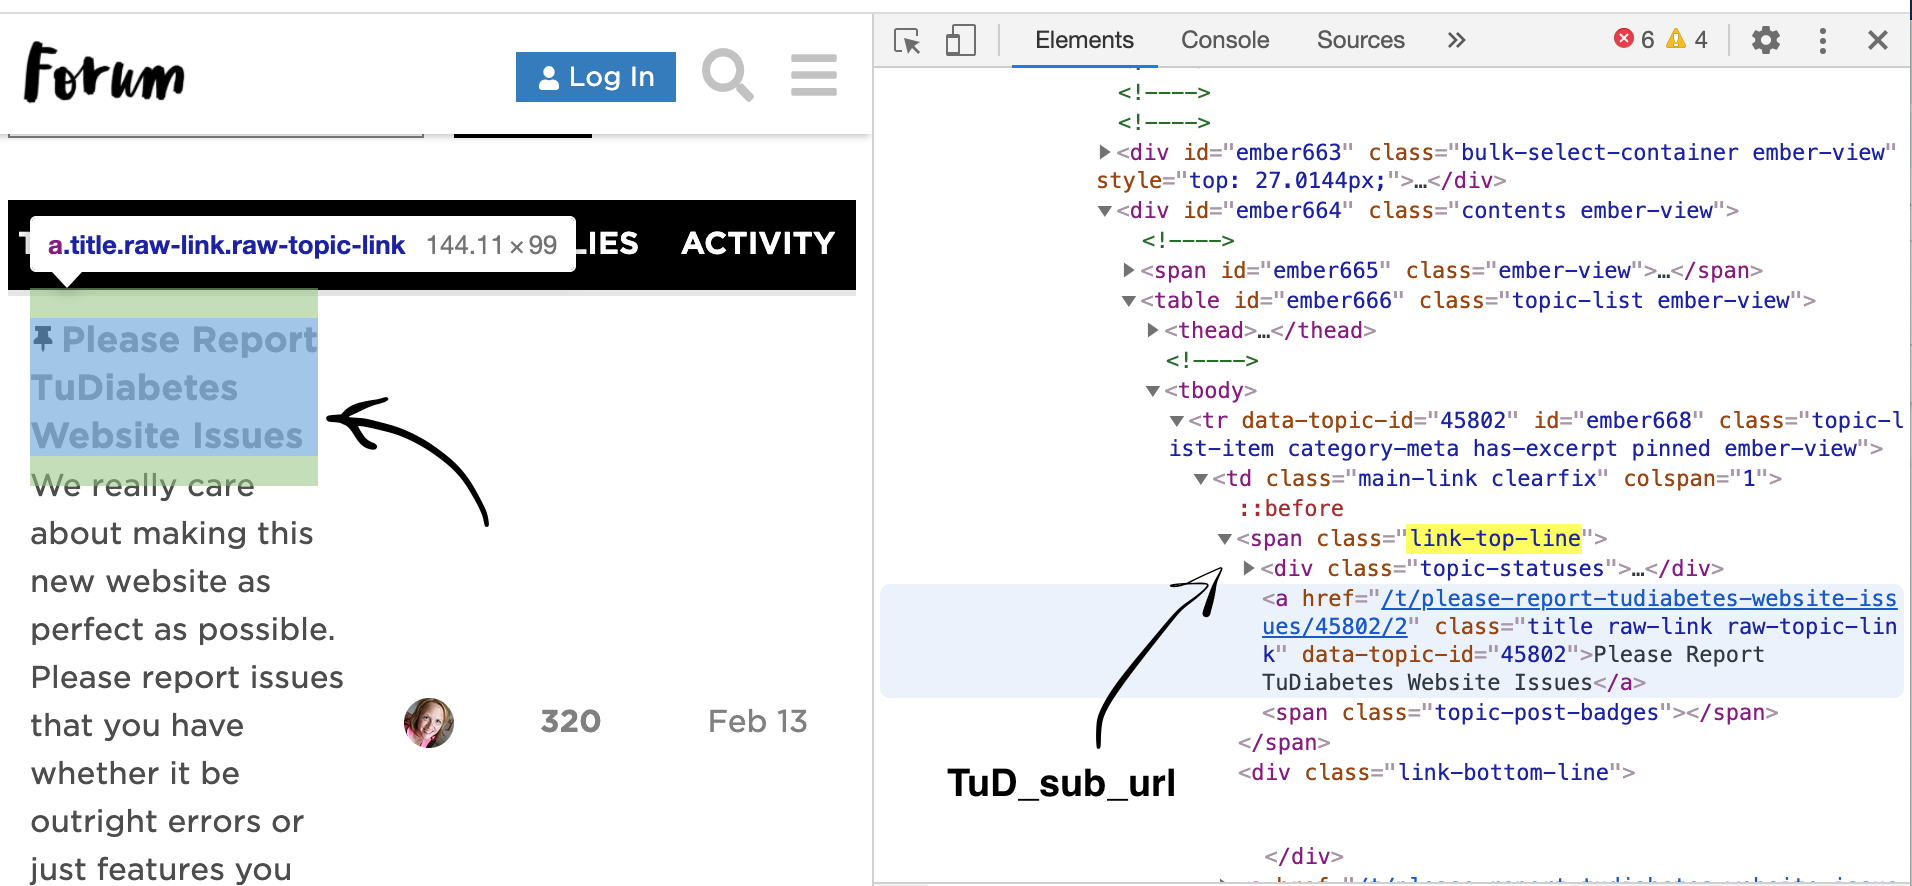


## TuD_sub_url

In [37]:
TuD_url="https://forum.tudiabetes.org/c/meta/3"
driver.get(TuD_url)
#Selenium hands the page source to Beautiful Soup
TuD_soup=BeautifulSoup(driver.page_source, 'html.parser')
TuD_sub_url=[]
for i in TuD_soup.find_all('span', attrs={"class": "link-top-line"}):
  c=[item.get("href") for item in i.find_all("a")]
  TuD_sub_url.append(c)
TuD_sub_url

[['/t/please-report-tudiabetes-website-issues/45802'],
 ['/t/how-to-customize-your-profile/49580'],
 ['/t/current-process-for-setting-passwords/45863'],
 ['/t/about-the-tudiabetes-website-category/2'],
 ['/t/migration-faq/23355'],
 ['/t/old-timers-of-the-original-tudiabetes/83325'],
 ['/t/home-page-looking-good-on-pc-not-so-good-on-iphone/83349'],
 ['/t/change-t1d-tech-to-something-more-inclusive/83898'],
 ['/t/a-step-back-for-the-home-page/83299'],
 ['/t/some-website-improvement-noticed-by-me/83215'],
 ['/t/i-used-to-be-able-to-post-images-but-cannot-anymore/81915'],
 ['/t/insulin-pumps-linked-to-more-reports-of-injury-and-death-than-any-other-medical-device-records-show/74034'],
 ['/t/adding-links-outside-sources-to-your-discussion/77558'],
 ['/t/how-to-quote-someone-in-a-post/77228'],
 ['/t/alt-text-for-images-website-accessibility/66778'],
 ['/t/ads-in-the-middle-of-a-persons-post/68618'],
 ['/t/blogging-on-tudiabetes-is-changing/45689'],
 ['/t/new-logo-is-dominating-over-everythin

In [38]:
TuD_sub_url = [val for sublist in TuD_sub_url for val in sublist]
TuD_sub_url

['/t/please-report-tudiabetes-website-issues/45802',
 '/t/how-to-customize-your-profile/49580',
 '/t/current-process-for-setting-passwords/45863',
 '/t/about-the-tudiabetes-website-category/2',
 '/t/migration-faq/23355',
 '/t/old-timers-of-the-original-tudiabetes/83325',
 '/t/home-page-looking-good-on-pc-not-so-good-on-iphone/83349',
 '/t/change-t1d-tech-to-something-more-inclusive/83898',
 '/t/a-step-back-for-the-home-page/83299',
 '/t/some-website-improvement-noticed-by-me/83215',
 '/t/i-used-to-be-able-to-post-images-but-cannot-anymore/81915',
 '/t/insulin-pumps-linked-to-more-reports-of-injury-and-death-than-any-other-medical-device-records-show/74034',
 '/t/adding-links-outside-sources-to-your-discussion/77558',
 '/t/how-to-quote-someone-in-a-post/77228',
 '/t/alt-text-for-images-website-accessibility/66778',
 '/t/ads-in-the-middle-of-a-persons-post/68618',
 '/t/blogging-on-tudiabetes-is-changing/45689',
 '/t/new-logo-is-dominating-over-everything/65729',
 '/t/visual-changes-are-h

In [41]:
len(TuD_sub_url)

30

## df_TuD

In [71]:
df_TuD=pd.DataFrame({'TuDiabetes Website':TuD_club_topics,'TuD_replies':TuD_club_replies,'TuD_views':TuD_club_views,'TuD_Activies':TuD_club_Activity,'TuD_topic_urls':TuD_sub_url})
df_TuD

,TuDiabetes Website,TuD_replies,TuD_views,TuD_Activies,TuD_topic_urls
0,\n\nPlease Report TuDiabetes Website Issues\n,320,14.9k,Feb 13,/t/please-report-tudiabetes-website-issues/45802
1,\n\nHow to Customize Your Profile\n,2,3.5k,Dec '18,/t/how-to-customize-your-profile/49580
2,\n\nCurrent Process For Setting Passwords\n,1,3.5k,Apr '15,/t/current-process-for-setting-passwords/45863
3,\n\nAbout the TuDiabetes Website category\n,2,3.3k,Apr '15,/t/about-the-tudiabetes-website-category/2
4,\n\nMigration FAQ\n,6,3.7k,Mar '15,/t/migration-faq/23355
5,Old timers of the original Tudiabetes\n,44,1.4k,Oct 5,/t/old-timers-of-the-original-tudiabetes/83325
6,Home page looking good on PC! Not so good on i...,7,426,Aug 22,/t/home-page-looking-good-on-pc-not-so-good-on...
7,Change “T1D Tech” to something more inclusive?\n,2,323,Aug 18,/t/change-t1d-tech-to-something-more-inclusive...
8,A step back for the home page\n,2,228,Jun 30,/t/a-step-back-for-the-home-page/83299
9,Some website improvement noticed by me!\n,1,278,Jun 21,/t/some-website-improvement-noticed-by-me/83215


In [186]:
df_TuD.to_csv('df_TuD.csv',index=False)

#TUD12 (Insulin pumps linked to more reports of injury and death than any other medical device, records show)

Checking the df_TUD dataframe I can see that "Insulin pumps linked to more reports of injury." and "Please Report TuDiabetes Website Issues\" have alot of discussion so I decided dto scrape "Insulin pumps linked to more reports of injury." and called it **TuD12**

In [134]:
TUD12_url='https://forum.tudiabetes.org/t/insulin-pumps-linked-to-more-reports-of-injury-and-death-than-any-other-medical-device-records-show/74034/15'

In [149]:
# driver.implicitly_wait(30)
driver.get(TUD12_url)

# python_button = driver.find_element_by_id('main') #FHSU
# python_button.click()

In [150]:
#Selenium hands the page source to Beautiful Soup
TuD12_soup=BeautifulSoup(driver.page_source, 'lxml')
TuD12_forums=[e.text for e in TuD12_soup.find_all('div',attrs={'class':'cooked'})]
TuD12_forums

['I have used an insulin pump (Disetronic, Animas, now Tandem tSlim X2) for 20+ years.  There are reasons they are dangerous–they hold that deadly liquid, insulin.  They do malfunction, so you have to be very observant and have a backup plan.  But I would not go back to MDI, the insulin pump just has too many advantages.',
 'Yes, I agree, this is about Medtronic specifically and not insulin pumps in general; however, I read this story with great interest because I had a problem with my Omnipod PDM malfunctioning.\nI gained a whole new insight into the customer service aspect of Insulet, which I suspect is not much different from any other insulin pump/medical supply company. Yes, they eventually replaced the PDM - and all the problems I was having went away immediately - but it was not without dogged determination on my part.\nIn my opinion, when I first called about the problem I was having, it should have raised a red flag on their end. When I continued to report the same problem, th

In [160]:

TuD12_date=[e.text for e in TuD12_soup.find_all('div',attrs={'class':'post-info post-date'})]
TuD12_date

["Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Nov '18",
 "Dec '18",
 "Dec '18",
 "Dec '18",
 "Dec '18"]

In [161]:
len(TuD12_date)

20

In [139]:
import requests

In [151]:
len(TuD12_forums)

20

In [152]:
TuD12_user=[e.text for e in TuD12_soup.find_all('div', attrs={"class": re.compile(r'name')})]
TuD12_user

['Melitta',
 'Josefine',
 'njsokalski',
 'MamaB1',
 'meeeType 1 or LADA',
 'JenType 1 or LADA',
 'J1112',
 'Richard157',
 'Terry4',
 'Dave44',
 'Eric2',
 'Scott_Eric',
 'Jim_in_CalgaryType 1 or LADA',
 'Donnie1',
 'Terry4',
 'Jim_in_CalgaryType 1 or LADA',
 'Sally7',
 'Scott_Eric',
 'Scott_Eric',
 'Sam19']

In [154]:
len(TuD12_user)

20

## df_TuD12

In [162]:
df_TuD12=pd.DataFrame({'TuD12_user':TuD12_user,'TuD12_forums':TuD12_forums,'TuD12_date':TuD12_date})
df_TuD12

,TuD12_user,TuD12_forums,TuD12_date
0,Melitta,"I have used an insulin pump (Disetronic, Anima...",Nov '18
1,Josefine,"Yes, I agree, this is about Medtronic specific...",Nov '18
2,njsokalski,"I agree completely. Sure, it may sometimes not...",Nov '18
3,MamaB1,"Prior to using an insulin pump, I had a histor...",Nov '18
4,meeeType 1 or LADA,I have had problems where it could have put me...,Nov '18
5,JenType 1 or LADA,I’ve used to pumps over the years (Deltec Cozm...,Nov '18
6,J1112,Interesting read. Except for the fake news and...,Nov '18
7,Richard157,"@Mila, thanks for this article and discussion!...",Nov '18
8,Terry4,I don’t get why we’re now seeing a flurry of m...,Nov '18
9,Dave44,I’ll go out on a limb and surmise that many o...,Nov '18


In [185]:
df_TuD12.to_csv('df_TuD12.csv',index=False)

In [164]:
ls

 BeautifulSoup.ipynb                        df_TuD.csv
'Copy of Copy of official_notebook.ipynb'   module2_tutorial/
'Copy of official_notebook.ipynb'           official_notebook.ipynb
 df_main.csv                                practiceBeautifulSoup.ipynb
 df_Social_club.csv                         TuD12_forums.pkl
 df_TuD12.csv                               website.gdoc
 df_TuD1.csv


#TUD1 (Please Report TuDiabetes Website Issues\)

In [165]:
TUD1_url='https://forum.tudiabetes.org/t/please-report-tudiabetes-website-issues/45802'

In [146]:
driver.implicitly_wait(30)
driver.get(TUD1_url)

python_button = driver.find_element_by_id('main') #FHSU
python_button.click()

In [147]:
#Selenium hands the page source to Beautiful Soup
TuD1_soup=BeautifulSoup(driver.page_source, 'lxml')
TuD1_forums=[e.text for e in TuD1_soup.find_all('div',attrs={'class':'cooked'})]
TuD1_forums

['We really care about making this new website as perfect as possible.  Please report issues that you have whether it be outright errors or just features you think just don’t work as you wish.  The team may not end up catering to your utmost wish for disney based animations of each click you make on a link, but we do very much want your feedback.\nThis is of vital importance as we work through this roll out period as there will be many things that don’t work properly and we need to identify things and fix them.\nSo please, report away.',
 'I have been looking around for maybe an hour. Where the heck is chat?',
 'If you click HOME, you’ll see it at the bottom. It’s not on the forum section.',
 'I have a 3 second lag in chat, and there are only 3 of us there.',
 'FYI - a lot of people (including me) have been having trouble getting thru the password change and the login screens.  First, the site had trouble recognizing my email address for my correct profile at first - finally worked now

In [148]:
len(TuD1_forums)

19

## TuD1_user

In [ ]:
<div class="names trigger-user-card">

In [166]:
TuD1_user=[e.text for e in TuD1_soup.find_all('div',attrs={'class':'names trigger-user-card'})]
TuD1_user

['Brian_BSC',
 'Lloyd',
 'MilaStaff',
 'Lloyd',
 'ThasType 1 or LADA',
 'ThasType 1 or LADA',
 'Lloyd',
 'Lloyd',
 'Brian_BSC',
 'Brian_BSC',
 'HolgerType 1 or LADA',
 'HolgerType 1 or LADA',
 'Brian_BSC',
 'MarieBType 1 or LADA',
 'curlysarahType 1 or LADA',
 'irrational_JohnType 1 or LADA',
 'Lloyd',
 'irrational_JohnType 1 or LADA',
 'Lloyd']

In [ ]:
len(TuD1_user)

19

In [ ]:
len(TuD1_forums)

19

In [169]:
TuD1_date=[e.text for e in TuD1_soup.find_all('div',attrs={'class':'post-info post-date'})]
TuD1_date

["Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15",
 "Apr '15"]

In [ ]:
len(TuD1_date)

19

## df_TuD1

In [170]:
df_TuD1=pd.DataFrame({'TuD1_user':TuD1_user,'TuD1_forums':TuD1_forums,'TuD1_date':TuD1_date})
df_TuD1

,TuD1_user,TuD1_forums,TuD1_date
0,Brian_BSC,We really care about making this new website a...,Apr '15
1,Lloyd,I have been looking around for maybe an hour. ...,Apr '15
2,MilaStaff,"If you click HOME, you’ll see it at the bottom...",Apr '15
3,Lloyd,"I have a 3 second lag in chat, and there are o...",Apr '15
4,ThasType 1 or LADA,FYI - a lot of people (including me) have been...,Apr '15
5,ThasType 1 or LADA,"Was navigating around through discussions and,...",Apr '15
6,Lloyd,"On my ipad mini, on the home page, discussions...",Apr '15
7,Lloyd,"I chose a topic to reply to dated April 13, on...",Apr '15
8,Brian_BSC,\n\n\n Lloyd:\n\nI have a 3 second lag in chat...,Apr '15
9,Brian_BSC,\n\n\n Thas1:\n\nFYI - a lot of people (includ...,Apr '15


In [184]:
df_TuD1.to_csv('df_TuD1.csv',index=False)

In [ ]:
import pandas as pd

#Social Clubs

In [ ]:
social_url="https://forum.tudiabetes.org/c/social-clubs/60"



# create a new Firefox session
# driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(30)
driver.get(social_url)

python_button = driver.find_element_by_id('main') #FHSU
python_button.click()

In [ ]:
python_button.text

"Log In\nSocial Clubs\nall\nLatest\nTop\nADVERTISEMENT\nTOPIC REPLIES ACTIVITY\nAbout the Social Clubs category\nSocial Clubs\nSocial Clubs are places for people with similar interest to meet. These Social Clubs are not necessarily about diabetes but they can be. You will find that these clubs are listed as sub-categories of this Social Clubs c… read more\n2 Jul '18\nLatest Movie You’ve Seen?\nMovies and Entertainment Media\n5 May '19\nAnyone doing the Broad St. Run in philly\nRunning\n0 Feb '19\nEmbroidery…. just starting out\nCarefully Crafted\n2 Feb '19\nHome theatre\nMovies and Entertainment Media\n0 Oct '18\nThis is just SO COOL! Dog Art out of Bike Chains!\nA Dogs Life\n0 Oct '18\nUnfriendly cats\nCat Lovers\n0 Sep '18\nTransition\nPoetry and Prose\n0 Sep '18\nIt’s PLAY TIME!\nA Dogs Life\n0 Sep '18\nAll About Dogs\nA Dogs Life\n0 Aug '18\nWelcome to A Dogs Life!\nA Dogs Life\n0 Aug '18\nInsomnia\nPoetry and Prose\n0 Aug '18\nHaiku\nPoetry and Prose\n0 Aug '18\nLow carb waffles! 

In [ ]:
driver.page_source

'<html lang="en-US" class="desktop-view not-mobile-device text-size-normal anon no-touch discourse-no-touch"><head>\n    <meta charset="utf-8">\n    <title>Latest Social Clubs topics - TuDiabetes Forum</title>\n    <meta name="description" content="Social Clubs are places for people with similar interest to meet. These Social Clubs are not necessarily about diabetes but they can be.">\n    <meta name="discourse_theme_ids" content="11">\n    <meta name="discourse_current_homepage" content="latest">\n    <meta name="generator" content="Discourse 2.7.0.beta1 - https://github.com/discourse/discourse version 06077856ce39743592bcd46b7a0305ff6a287e9e">\n<link rel="icon" type="image/png" href="https://aws1.discourse-cdn.com/tudiabetes/optimized/3X/5/e/5e2b9c1dd7002377bce4846771baf02107c266f1_2_32x32.png">\n<link rel="apple-touch-icon" type="image/png" href="https://aws1.discourse-cdn.com/tudiabetes/optimized/3X/b/9/b96cb51c50435a5d09dbfd843ac5cdc4c46c58c8_2_180x180.png">\n<meta name="theme-col

#Social Club Topics

In [ ]:
import re

In [ ]:
social_url='https://forum.tudiabetes.org/c/social-clubs/60'
driver.get(social_url)

In [ ]:
#Selenium hands the page source to Beautiful Soup
Social_soup=BeautifulSoup(driver.page_source, 'lxml')
Social_club_topics=[e.text for e in Social_soup.find_all('span',attrs={'class':'link-top-line'})]
Social_club_topics

['\n\nAbout the Social Clubs category\n',
 'Latest Movie You’ve Seen?\n',
 'Anyone doing the Broad St. Run in philly\n',
 'Embroidery…. just starting out\n',
 'Home theatre\n',
 'This is just SO COOL! Dog Art out of Bike Chains!\n',
 'Unfriendly cats\n',
 'Transition\n',
 'It’s PLAY TIME!\n',
 'All About Dogs\n',
 'Welcome to A Dogs Life!\n',
 'Insomnia\n',
 'Haiku\n',
 'Low carb waffles! Will try them this weekend\n',
 'Shirataki Noodles, Vegan Napoli\n',
 'Drought\n',
 'In search of quick recipes\n',
 'Haiku\n',
 'Mission Impossible\n',
 'How to Join a Social Club\n',
 'Social clubs that have been suggested\n',
 'Holaaaa!\n',
 'What a beautiful creation\n',
 'Don’t Worry, He Won’t Get Far on Foot\n',
 'List of Social Clubs\n',
 'About the quilt\n']

In [ ]:
len(Social_club_topics)

26

#Social Club Cat

In [ ]:

Social_club_cat=[e.text for e in Social_soup.find_all('span',attrs={'class':'category-name'})]
Social_club_cat[1:]

['Social Clubs',
 'Movies and Entertainment Media',
 'Running',
 'Carefully Crafted',
 'Movies and Entertainment Media',
 'A Dogs Life',
 'Cat Lovers',
 'Poetry and Prose',
 'A Dogs Life',
 'A Dogs Life',
 'A Dogs Life',
 'Poetry and Prose',
 'Poetry and Prose',
 'For The Love of Food',
 'For The Love of Food',
 'Poetry and Prose',
 'For The Love of Food',
 'Poetry and Prose',
 'Movies and Entertainment Media',
 'Social Clubs',
 'Social Clubs',
 'Running',
 'Carefully Crafted',
 'Movies and Entertainment Media',
 'Social Clubs',
 'Carefully Crafted']

In [ ]:
len(Social_club_cat[1:])

26

#df_Social_club

In [ ]:
df_Social_club=pd.DataFrame({'Social Clubs':Social_club_topics,'Social_club_cat':Social_club_cat[1:]})
df_Social_club

,Social Clubs,Social_club_cat
0,\n\nAbout the Social Clubs category\n,Social Clubs
1,Latest Movie You’ve Seen?\n,Movies and Entertainment Media
2,Anyone doing the Broad St. Run in philly\n,Running
3,Embroidery…. just starting out\n,Carefully Crafted
4,Home theatre\n,Movies and Entertainment Media
5,This is just SO COOL! Dog Art out of Bike Chai...,A Dogs Life
6,Unfriendly cats\n,Cat Lovers
7,Transition\n,Poetry and Prose
8,It’s PLAY TIME!\n,A Dogs Life
9,All About Dogs\n,A Dogs Life


In [ ]:
df_Social_club.to_csv('df_Social_club.csv')


In [ ]:
df_Social_clubdf.to_csv()

In [ ]:
# Social_club_cat=[e for e in Social_soup.find_all('a',attrs={'class':'latest'})]
# Social_club_cat

# ***scrape multiple urls***

https://towardsdatascience.com/scraping-multiple-urls-with-python-tutorial-2b74432d085f

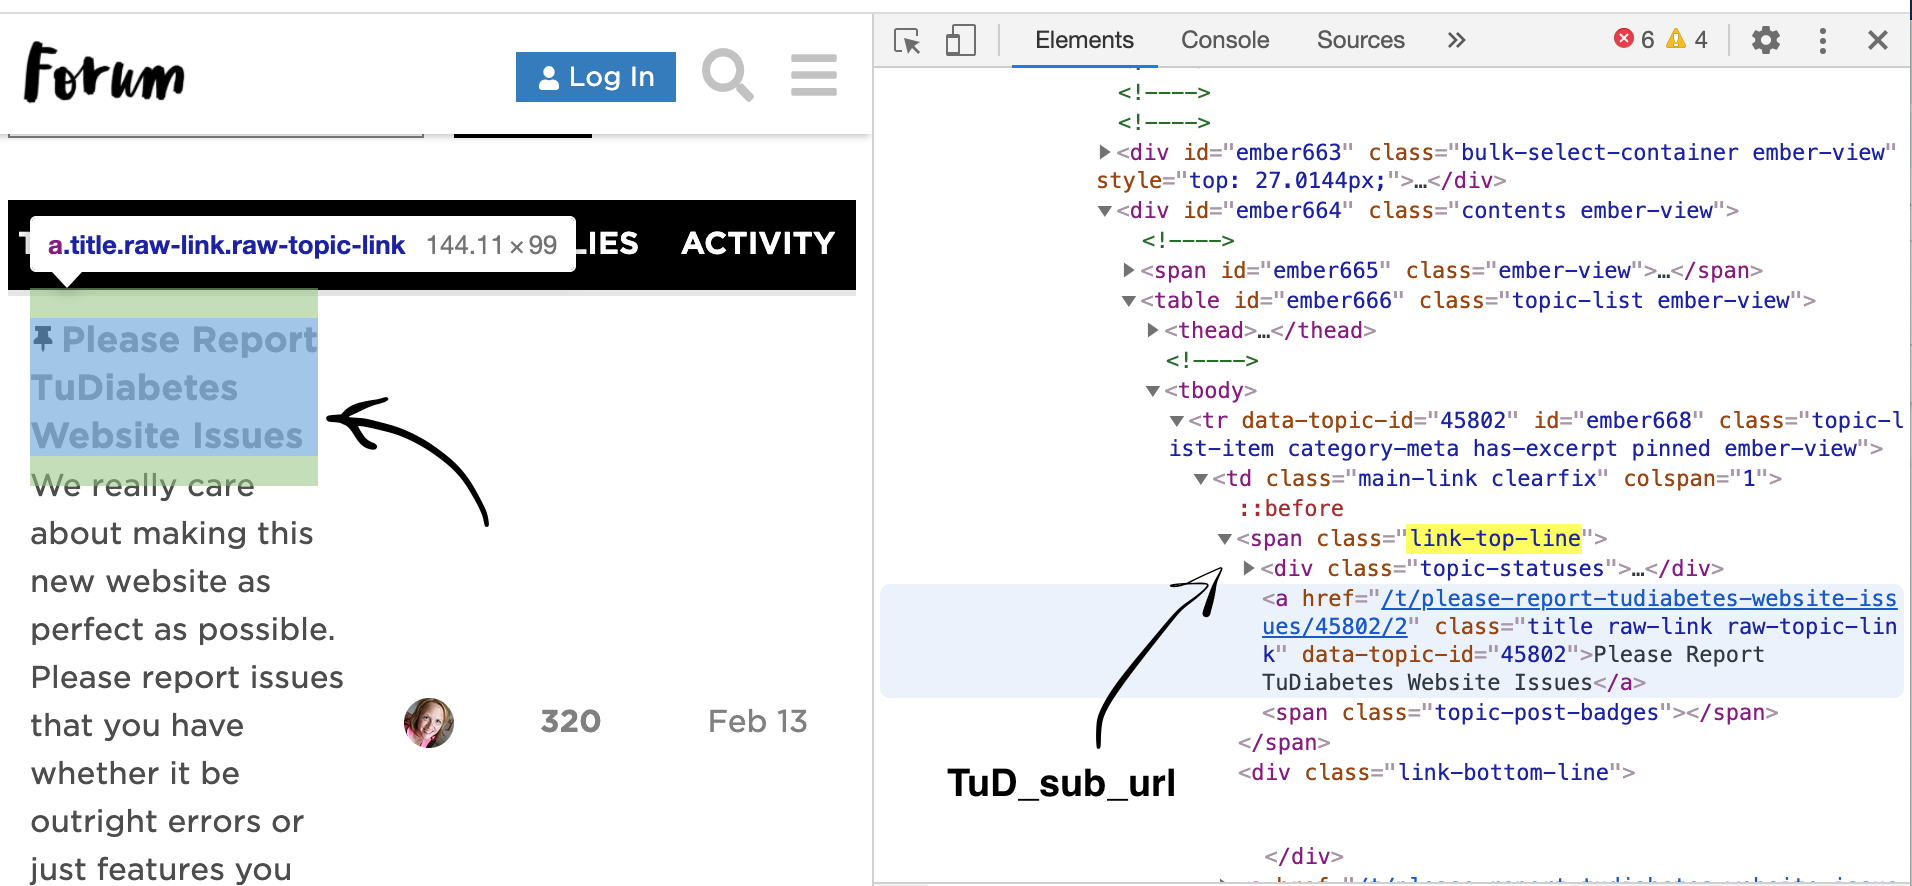

In [171]:
final_list=[]
for i in TuD_soup.find_all('span', attrs={"class": "link-top-line"}):
  c=[item.get("href") for item in i.find_all("a")]
  final_list.append(['https://forum.tudiabetes.org'+str(s) for s in c])

In [172]:
final_list

[['https://forum.tudiabetes.org/t/please-report-tudiabetes-website-issues/45802'],
 ['https://forum.tudiabetes.org/t/how-to-customize-your-profile/49580'],
 ['https://forum.tudiabetes.org/t/current-process-for-setting-passwords/45863'],
 ['https://forum.tudiabetes.org/t/about-the-tudiabetes-website-category/2'],
 ['https://forum.tudiabetes.org/t/migration-faq/23355'],
 ['https://forum.tudiabetes.org/t/old-timers-of-the-original-tudiabetes/83325'],
 ['https://forum.tudiabetes.org/t/home-page-looking-good-on-pc-not-so-good-on-iphone/83349'],
 ['https://forum.tudiabetes.org/t/change-t1d-tech-to-something-more-inclusive/83898'],
 ['https://forum.tudiabetes.org/t/a-step-back-for-the-home-page/83299'],
 ['https://forum.tudiabetes.org/t/some-website-improvement-noticed-by-me/83215'],
 ['https://forum.tudiabetes.org/t/i-used-to-be-able-to-post-images-but-cannot-anymore/81915'],
 ['https://forum.tudiabetes.org/t/insulin-pumps-linked-to-more-reports-of-injury-and-death-than-any-other-medical-dev

flatten the nested loop

https://stackoverflow.com/questions/11264684/flatten-list-of-lists

In [173]:
flattened = [val for sublist in final_list for val in sublist]
flattened

['https://forum.tudiabetes.org/t/please-report-tudiabetes-website-issues/45802',
 'https://forum.tudiabetes.org/t/how-to-customize-your-profile/49580',
 'https://forum.tudiabetes.org/t/current-process-for-setting-passwords/45863',
 'https://forum.tudiabetes.org/t/about-the-tudiabetes-website-category/2',
 'https://forum.tudiabetes.org/t/migration-faq/23355',
 'https://forum.tudiabetes.org/t/old-timers-of-the-original-tudiabetes/83325',
 'https://forum.tudiabetes.org/t/home-page-looking-good-on-pc-not-so-good-on-iphone/83349',
 'https://forum.tudiabetes.org/t/change-t1d-tech-to-something-more-inclusive/83898',
 'https://forum.tudiabetes.org/t/a-step-back-for-the-home-page/83299',
 'https://forum.tudiabetes.org/t/some-website-improvement-noticed-by-me/83215',
 'https://forum.tudiabetes.org/t/i-used-to-be-able-to-post-images-but-cannot-anymore/81915',
 'https://forum.tudiabetes.org/t/insulin-pumps-linked-to-more-reports-of-injury-and-death-than-any-other-medical-device-records-show/74034'

In [175]:
#goes over the very two urls 'https://forum.tudiabetes.org/t/please-report-tudiabetes-website-issues/45802',&'https://forum.tudiabetes.org/t/how-to-customize-your-profile/49580'

data=[]
import random
from time import sleep
for i in range(len(flattened)):
    url = str(flattened[i])
    driver2 =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    driver2.get(url) 
    sleep(random.randint(10,20))
    soup = BeautifulSoup(driver2.page_source, 'html.parser')
    
    forums=[e.text for e in soup.find_all('div',attrs={'class':'cooked'})]
    for tag in forums:
      data.append(tag)

data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


['We really care about making this new website as perfect as possible.  Please report issues that you have whether it be outright errors or just features you think just don’t work as you wish.  The team may not end up catering to your utmost wish for disney based animations of each click you make on a link, but we do very much want your feedback.\nThis is of vital importance as we work through this roll out period as there will be many things that don’t work properly and we need to identify things and fix them.\nSo please, report away.',
 'I have been looking around for maybe an hour. Where the heck is chat?',
 'If you click HOME, you’ll see it at the bottom. It’s not on the forum section.',
 'I have a 3 second lag in chat, and there are only 3 of us there.',
 'FYI - a lot of people (including me) have been having trouble getting thru the password change and the login screens.  First, the site had trouble recognizing my email address for my correct profile at first - finally worked now

In [176]:
len(data)

244

In [177]:

df_forums=pd.DataFrame({'forums':data})
df_forums

,forums
0,We really care about making this new website a...
1,I have been looking around for maybe an hour. ...
2,"If you click HOME, you’ll see it at the bottom..."
3,"I have a 3 second lag in chat, and there are o..."
4,FYI - a lot of people (including me) have been...
...,...
239,"@momof2T1s2, we would have a hard time doing i..."
240,Few things offer the versatility of a good old...
241,"I do input all,y data into my dexcom so when I..."
242,Decision Moves Continuous Glucose Monitors One...


## df_forums

In [182]:
df_forums.to_csv('df_forums.csv',index=False)